# TEC 645 Final Assignment

As always, we begin with basic EDA. To help us get a sense of what the dataset looks like, we can import the `Tweets.csv` dataset and use the ```head()``` method to print out the first 10 values.

In [1]:
import pandas as pd

data = pd.read_csv("Tweets.csv")
data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


As we are classifying sentiment from text data, we will be using the  `text` column as the input for classification and the `airline_sentiment` column as the output. We also encode the output column into 

In [2]:
data = data[["text", "airline_sentiment"]]
data.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [3]:
output_classification = {
    "neutral": 0,
    "positive": 1,
    "negative": 2
}
if not data["airline_sentiment"].dtype == "int64":
    data["airline_sentiment"] = data["airline_sentiment"].map(lambda s: output_classification[s])

data.head(5)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,0
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,0
3,@VirginAmerica it's really aggressive to blast...,2
4,@VirginAmerica and it's a really big bad thing...,2


## EDA


First, it would help to identify any _null values_ and deal with them. Fortunately, it seems that the dataset has been cleaned beforehand and no null values exist in the dataset.

In [4]:
(data.isna() / len(data)).sum()

text                 0.0
airline_sentiment    0.0
dtype: float64


### Distribution of datasets 📊

It may be valuable to look at the distribution of sentiments.

<Axes: xlabel='airline_sentiment', ylabel='count'>

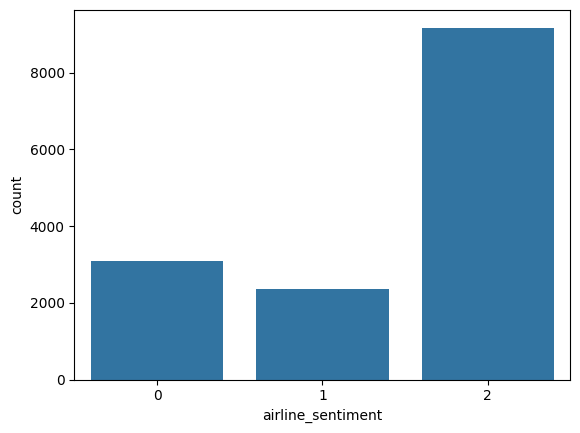

In [5]:
import seaborn as sns

sns.barplot(data["airline_sentiment"].value_counts())

We see that **overwhelmingly**, the tweets are negative, followed by neutral, then positive tweets. We should keep this in mind as we set our baseline model. To more effectively understand our baseline model, we can run the following calculations:

```
let:
    p = number of positive tweets
    n = number of negative tweets
    u = number of neutral tweets
```

$$
   P(X=p) = \frac{p}{p + n + u}
$$

<hr style="width:30%">

$$
   P(X=n) = \frac{n}{p + n + u}
$$

<hr style="width:30%">

$$
    P(X=u) =\frac{u}{p + n + u}
$$

In [6]:
print(data["airline_sentiment"].value_counts() / data["airline_sentiment"].value_counts().sum())

airline_sentiment
2    0.626913
0    0.211680
1    0.161407
Name: count, dtype: float64


For each category, our model has to perform better than this baseline in order to be an improvement over a crude probabilistic guess.

### WordCloud Representations ☁️

Next, we create wordcloud representations to help us figure out which words are common for each category of output. To avoid issues regarding the uneven distribution of sentiments, we randomly sample 2000 rows of the dataset such that there is an equal number of positive, negative, and neutral elements.

Text(0.5, 1.0, 'Neutral Sentiment')

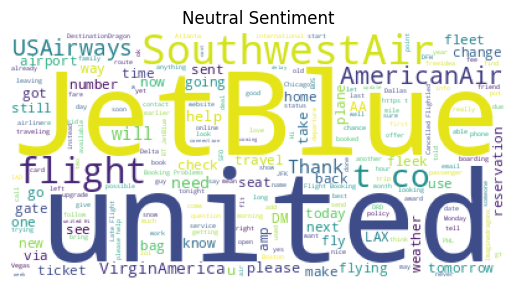

In [7]:
import wordcloud as wc
import matplotlib.pyplot as plt

neutral_sampled_text = data["text"].groupby(data["airline_sentiment"]).get_group(0).sample(2000)

plt.imshow(wc.WordCloud(background_color="white",collocations=True).generate(' '.join(neutral_sampled_text)))
plt.axis("off")
plt.title("Neutral Sentiment")

Text(0.5, 1.0, 'Positive Sentiment')

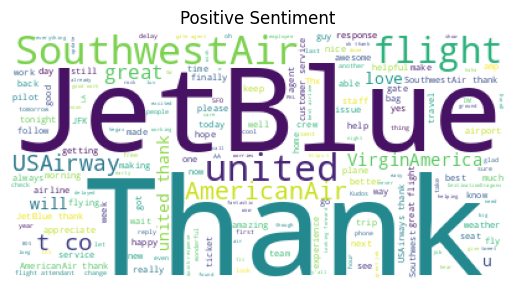

In [8]:
positive_sampled_text = data["text"].groupby(data["airline_sentiment"]).get_group(1).sample(2000)

plt.imshow(wc.WordCloud(background_color="white",collocations=True).generate(' '.join(positive_sampled_text)))
plt.axis("off")
plt.title("Positive Sentiment")

Text(0.5, 1.0, 'Negative Sentiment')

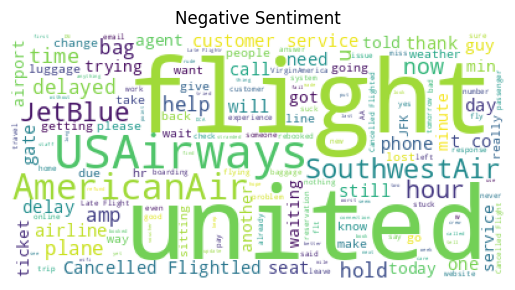

In [9]:
negative_sampled_text = data["text"].groupby(data["airline_sentiment"]).get_group(2).sample(2000)

plt.imshow(wc.WordCloud(background_color="white",collocations=True).generate(' '.join(negative_sampled_text)))
plt.axis("off")
plt.title("Negative Sentiment")

It was tempting to remove the the twitter user tags (characters sandwiched between an `@` character and an `' '`)  but ultimately, I decided the name of the airline is a useful indication of the quality of service, and thus, the sentiment. We notice that customers generally think positively or neutrally of JetBlue and SouthwestAir, and are less favourable towards United Airlines and USAirways.

### Word count analysis 🧮

It may also be helpful to consider tweet length with regards to the category - this may or may not be a feature to help predict sentiment.

<Axes: xlabel='airline_sentiment', ylabel='wc'>

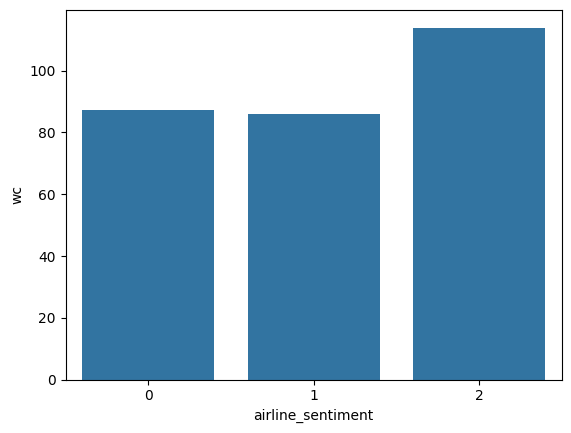

In [10]:
data["wc"] = data["text"].apply(len)
sns.barplot(data["wc"].groupby(data["airline_sentiment"]).mean())

The distribution seems to resemble the bar graph above: this implies there's a strong correlation between sentiment and word length. Intuitively, it makes sense - More upset customers write longer tweets explaining their dissatisfaction. In that case, we can disregard wordcount as a feature and drop it.

In [11]:
data = data.drop("wc", axis=1)

### LDA Analysis

Since we know what the classifications are, we are using supervised learning. In this case we can use LDA analysis to simplify the dimensionality of teh dataset.

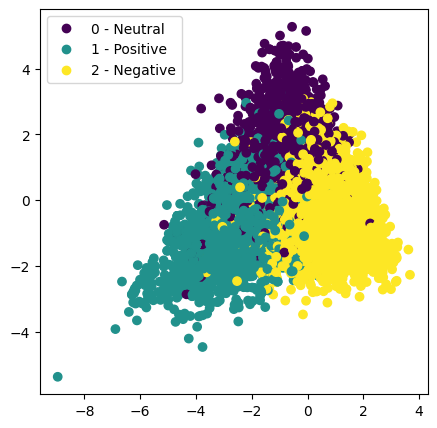

In [12]:
from sklearn import metrics
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer

data_samples = data["text"]
data_target = data["airline_sentiment"]
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1500, stop_words='english')
tfidf = vectorizer.fit_transform(data_samples)

lda = LinearDiscriminantAnalysis(n_components=2)
ldaComponents = lda.fit(tfidf.toarray(), data_target)
ldaComponents = lda.transform(tfidf.toarray())

# Create and show the plot.
plt.figure(figsize=(5, 5))
scatter = plt.scatter(ldaComponents[:,0], ldaComponents[:,1], c=data_target)
handles = [plt.Line2D([], [], marker="o", ls="", color=scatter.cmap(scatter.norm(i))) for i in np.unique(data_target)]
plt.legend(handles, ["0 - Neutral", "1 - Positive", "2 - Negative"])


Interestingly, we can quite cleanly separate the three categories given enough features. I settled on 1500 as that's the point where increasing the number no longer improved separability.

## Creating the Model 🤖

### Decision Tree Classifier 🌲

The first model we will attempt to make predictions with is the **[Descision Tree Classifier](https://en.wikipedia.org/wiki/Decision_tree_learning)**, a fast and computationally cheap model for classification learning.

![image](./Decision_tree.jpg "Gilgoldm")

Courtesy of Gilgoldm, Wikimedia Commons.  The image shows a decision tree classifier predicting odds of survival of Titanic passengers.

First, we split our dataset into training and validation subsets. Since we don't have that large of a dataset, We'll be using a test_train split of 70/30. We use the same tf-idf hyperparameters as above, as they've yielded good separability.



In [13]:
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1500, stop_words='english')
tfidf = vectorizer.fit_transform(data_samples)

X_train, X_test, y_train, y_test = train_test_split(ldaComponents, data_target, test_size=0.3, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)


y_pred = dt_classifier.predict(X_test)

print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.60      0.58       884
           1       0.70      0.69      0.69       694
           2       0.87      0.85      0.86      2814

    accuracy                           0.77      4392
   macro avg       0.71      0.71      0.71      4392
weighted avg       0.78      0.77      0.78      4392



As you may recall, our naive baseline model had the following properties:

```
airline_sentiment
2    0.626913
0    0.211680
1    0.161407
Name: count, dtype: float64
```

Our model appears to be far superior to the baseline - comparing the f-scores  to the baseline predictions, we find the following improvements made:



In [15]:
print("neutral classification improvement: " + str((0.58 - 0.21) * 100) + "%")
print("positive classification improvement: " + str((0.69 - 0.16) * 100) + "%")
print("negative classification improvement: " + str((0.86 - 0.62) * 100) + "%")

neutral classification improvement: 37.0%
positive classification improvement: 52.99999999999999%
negative classification improvement: 24.0%


### Tweaking Hyperparameters

We can create several other instances of the classifier with tweaks to the hyperparameters. Lets try and see if we can get an improvement!

#### Experiments

In [16]:
dt_classifier = DecisionTreeClassifier(max_features = "log2")

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.60      0.58       884
           1       0.70      0.69      0.70       694
           2       0.87      0.85      0.86      2814

    accuracy                           0.77      4392
   macro avg       0.71      0.71      0.71      4392
weighted avg       0.78      0.77      0.77      4392



In [17]:
dt_classifier = DecisionTreeClassifier(max_leaf_nodes=20, class_weight={
    0: 2,
    1: 3,
    2: 4
})

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.52      0.62       884
           1       0.78      0.79      0.78       694
           2       0.86      0.94      0.90      2814

    accuracy                           0.83      4392
   macro avg       0.80      0.75      0.77      4392
weighted avg       0.83      0.83      0.82      4392



In [18]:
dt_classifier = DecisionTreeClassifier(max_leaf_nodes=20, max_features=5)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.64      0.68       884
           1       0.75      0.81      0.78       694
           2       0.89      0.90      0.90      2814

    accuracy                           0.83      4392
   macro avg       0.79      0.78      0.78      4392
weighted avg       0.83      0.83      0.83      4392



After some time experimenting, it seems the only hyperparameter to have a meaningful impact is constricting __max_leaf_nodes__ to ```20```. I started at some arbitrarily high number then approached zero, and 20 seems to be the sweet spot for maximizing the f-score. 

### Support Vector Machine ​↖️​↘️​

Another model we may try to use is the **[Support Vector Machine](https://en.wikipedia.org/wiki/Support_vector_machine)**. We do the same as above but with the new model:

In [19]:
from sklearn.svm import SVC

sv_classifier = SVC()

sv_classifier.fit(X_train, y_train)
y_pred = sv_classifier.predict(X_test)

print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.61      0.66       884
           1       0.81      0.78      0.79       694
           2       0.87      0.93      0.90      2814

    accuracy                           0.84      4392
   macro avg       0.80      0.77      0.78      4392
weighted avg       0.83      0.84      0.83      4392



Already, we see a minor improvement on the performance of this model(without any hyperparameter tuning) compared to the tuned dt_classifier experimented with earlier. Despite tweaking the hyperparameters, I"m struggling to see any changes to the performance of the model.

## ROC Curves

We can get more nuanced insights into the performance of the two models by calculating and examining the ROC curves of the two models. Below, we plot the ROCs of the hypertuned dt_classifier and sv_classifier models. Unfortunately, there is a problem:

In [20]:
fpr, tpr = metrics.roc_curve(y_test,  y_pred)

ValueError: multiclass format is not supported

Unfortunately, sklearn's ROC methods does not support multiclass classification, only binary classification, and so some creativity will be needed. After thinking on it for some time, one possible solution may be to treat each of the class predictions as a binomial trial (it predicted it correctly / it did not predict it correctly), and then scale that up by the number of classes. 

In [ ]:
from sklearn.preprocessing import label_binarize

binarized_classes = label_binarize(y=data_target, classes=data_target.unique())
print(""+str(list(data_target[:5])))
print(""+str(list(binarized_classes[:5])))

The matrix above represents the class encodings defined earlier, except they are now represented as unit vectors, with each dimension representing a class. Unforunately, this results in a sparse matrix like one-hot-encoding, and this assignment is already a few hours overdue and I can't figure out how to do this immediately, so I will move on to the next question.

## Model Selection

Overall, I will give the slightest edge to the SVM classifier, as it performs slightly better (looking at the f-scores and average) for the neutral and positive sentiments, while performing equally well to the hypertuned DTC model for the negative sentiments. It is difficult to say without looking at the ROC curve and the AUC, however.